In [9]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [24]:
with open("data/LinRegData.csv", "r") as file:
    df = pd.read_csv(file)

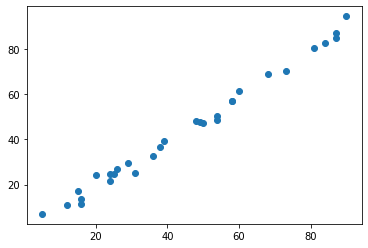

In [25]:
plt.scatter(df.x[:30], df.y[:30])

In [28]:
df = df.dropna()

In [29]:
def model(x, y, learning_rate, epochs):
    w, b = 0, 0
    m = x.shape[1]
    for i in range(epochs):
        h = w * x + b
        cost = (1/(2*m)) * np.sum((h - y) ** 2)
        print("cost at iteration", i, ":", cost)
        dw = (1/m) * np.sum((h - y) * x)
        db = (1/m) * np.sum((h - y))
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
    return w, b

In [43]:
def score(x, y, w, b):
    h = w * x + b
    m = x.shape[1]
    h_cost = (1/2*m) * np.sum((h - y) ** 2)
    total_cost = (1/2*m) * np.sum((np.mean(y) - y) ** 2)
    score = 1 - (h_cost/total_cost)
    return score

In [31]:
data = preprocessing.scale(df)
trainx, testx, trainy, testy = train_test_split(data[:, 0], data[:, 1], test_size = 0.2)

In [32]:
trainx = trainx.reshape(1, -1)
trainy = trainy.reshape(1, -1)
testx = testx.reshape(1, -1)
testy = testy.reshape(1, -1)

In [33]:
w, b = model(trainx, trainy, 1, 10)

cost at iteration 0 : 0.516344510518816
cost at iteration 1 : 0.004916330162327254
cost at iteration 2 : 0.0045405564972009396
cost at iteration 3 : 0.004540267352985645
cost at iteration 4 : 0.004540267130475722
cost at iteration 5 : 0.00454026713030449
cost at iteration 6 : 0.004540267130304359
cost at iteration 7 : 0.004540267130304358
cost at iteration 8 : 0.004540267130304358
cost at iteration 9 : 0.004540267130304358


In [44]:
print(score(testx, testy, w, b))

0.9882066320408333


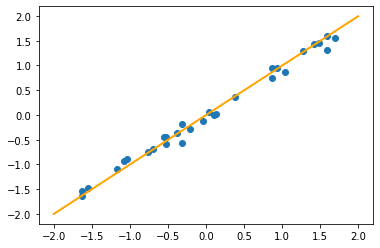

In [42]:
plt.scatter(testx[:, :30], testy[:, :30])
plt.plot([-2, 2], [w*-2+b, w*2+b], color = 'orange', linewidth = 2)
plt.show()